# **Coding Task 1 | Algorithms 2023 | EC31205**
#### Submitted by Irsh Vijay | 21EC30025
****
### **Question 1: Naive Robot Navigation Problem**
Please run the following code cells in succession and provide input parameters in the fourth cell.

The function is called in the fifth cell.

**For Input:**
```
maze = [[1, 1, 1, 1, 1],
[1, 0, 0, 0, 1],
[1, 0, 1, 1, 1],
[0, 1, 1, 1, 1]]

start = (0, 0)

end = (3, 2)

all_direction = False
```

**Expected Output:**<br><br>
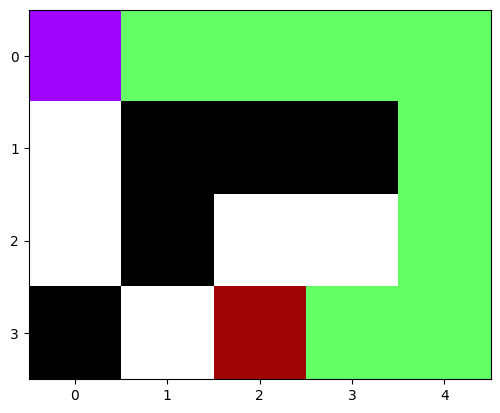

(True,
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 4),
  (2, 4),
  (3, 4),
  (3, 3),
  (3, 2)])

  **On a bit more complex maze:**<br>
  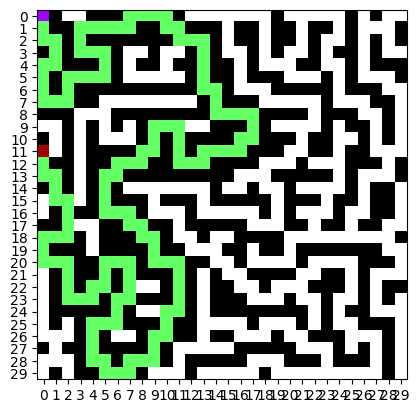

In [ ]:
def check_valid_move(maze, row, col, all_direction):
  return 0 <= row < len(maze) and 0 <= col < len(maze[0]) and maze[row][col] == 1

In [ ]:
import matplotlib.pyplot as plt

# A plot maze function to visualise the path taken

def plot_maze(maze, start = False, end = False, path = False):
  rows = len(maze)
  cols = len(maze[0])

  grid = [[(255, 255, 255) if maze[row][col] == 1 else (0, 0, 0) for col in range(cols)] for row in range(rows)]

  if start:
    grid[start[0]][start[1]] = (160, 4, 252)
  if end:
    grid[end[0]][end[1]] = (160, 4, 4)
  if path:
    for path_row, path_col in path:
      if(grid[path_row][path_col] != (160, 4, 252) and grid[path_row][path_col] != (160, 4, 4)):
        grid[path_row][path_col] = (100, 255, 100)

  plt.imshow(grid)
  plt.xticks(range(cols))
  plt.yticks(range(rows))
  plt.show()

In [ ]:
def naive_robot_navigation(maze, start, end, all_direction):
  allowed_directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
  if(all_direction):
    allowed_directions.extend([(1, 1), (-1, 1), (1, -1), (-1, -1)])

  # allowed_directions contain possible move sets from a particular point

  visited = set()
  queue = [(start, [])]

  while queue:
    (row, col), path = queue.pop(0)

    if (row, col) == end:
      plot_maze(maze, start, end, path + [(row, col)])
      return True, path + [(row, col)]

    # Breadth First Search Implementation

    for dr, dc in allowed_directions:
      new_row, new_col = row + dr, col + dc

      if check_valid_move(maze, new_row, new_col, all_direction) and (new_row, new_col) not in visited:
        visited.add((new_row, new_col))
        queue.append(((new_row, new_col), path + [(row, col)]))

  plot_maze(maze, start, end)
  return False, []

In [ ]:
maze = [[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1],
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]

start = (0, 0)

end = (11, 0)

all_direction = True

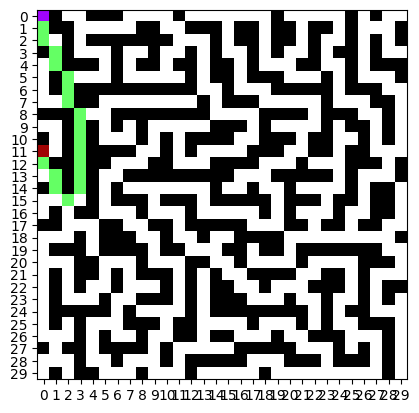

(True,
 [(0, 0),
  (1, 0),
  (2, 0),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 2),
  (7, 2),
  (8, 3),
  (9, 3),
  (10, 3),
  (11, 3),
  (12, 3),
  (13, 3),
  (14, 3),
  (15, 2),
  (14, 1),
  (13, 1),
  (12, 0),
  (11, 0)])

In [ ]:
naive_robot_navigation(maze, start, end, all_direction)